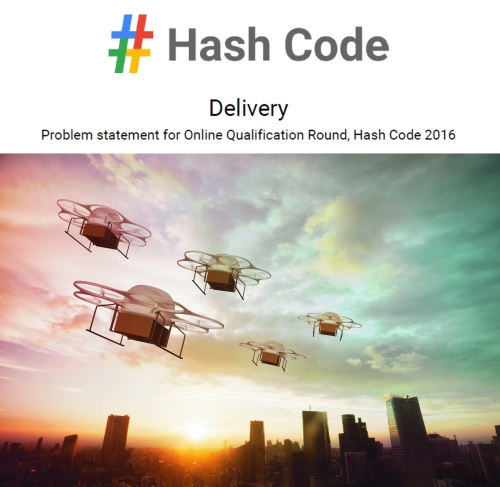



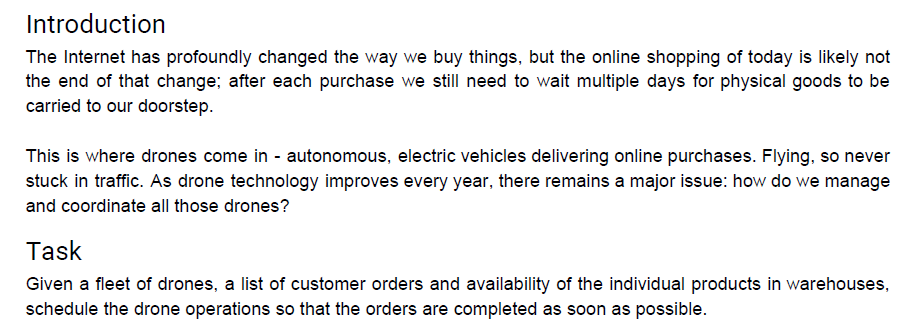

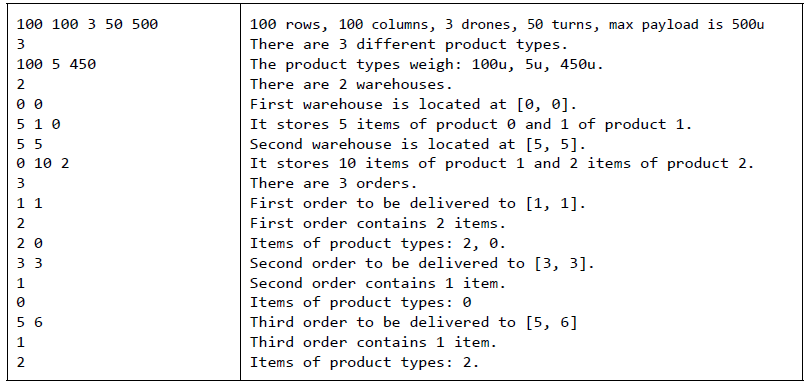

# Apertura del file di input in lettura

---



In [ ]:
File = open("Mother_of_all_warehouse.txt","r")
Lines = File.readlines()

# Lettura istanza

In [ ]:
Split_Line = Lines[0].split(" ") #separatore

#Leggi numero di righe e colonne della griglia, droni, turni e peso trasportabile
Num_Of_Rows = int(Split_Line[0])
Num_Of_Colums = int(Split_Line[1])
Num_Of_Drones = int(Split_Line[2])
Num_Of_Turns = int(Split_Line[3])
Num_Of_Payload = int(Split_Line[4])

#Leggi numero dei prodotti
Split_Line = Lines[1].split(" ")
Num_Of_Product_Types = int(Split_Line[0])

#Leggi peso dei prodotti
Product_types_weight = {}
Split_Line = Lines[2].split(" ")
for i in range(Num_Of_Product_Types):
    Product_types_weight[i] = int(Split_Line[i])

#Leggi numero di depositi
Split_Line = Lines[3].split(" ")
Num_Of_Warehouse = int(Split_Line[0])

#Leggi coordinate dei depositi e quantità dei prodotti in essi contenuti
Warehouse = {}
Line_number = 4
for j in range(Num_Of_Warehouse):
    Split_Line = Lines[Line_number].split(" ")

    Warehouse[j] = (int(Split_Line[0]), int(Split_Line[1]), [] )

    Split_Line = Lines[Line_number + 1].split(" ")
    for p in range(Num_Of_Product_Types):
        Warehouse[j][2].append(int(Split_Line[p]))

    Line_number = Line_number + 2

#Leggi numero di ordini
Split_Line = Lines[Line_number].split(" ")
Num_Of_Orders = int(Split_Line[0])

#Leggi coordinate della consegna, numero di oggetti ordinati e tipo degli oggetti
Orders = {}
Line_number += 1
for q in range(Num_Of_Orders):
    Split_Line = Lines[Line_number].split(" ") #Leggi coordinate
    Next_Line = Lines[Line_number + 1].split(" ") #Leggi la riga successiva alle coordinate (cioè il numero di oggetti ordinati)
    Orders[q] = (int(Split_Line[0]), int(Split_Line[1]), int(Next_Line[0]), [] )

    Split_Line = Lines[Line_number + 2].split(" ")
    for k in range(Orders[q][2]):
        Orders[q][3].append(int(Split_Line[k]))

    Line_number = Line_number + 3

# Algoritmo risolutore

Partendo dalla warehouse di origine, i droni caricano i prodotti finché hanno spazio disponibile per il trasporto. La consegna avviene calcolando il numero di turni necessari allo spostamento tra l'attuale posizione del drone e la posizione di destinazione ed aggiungendo i turni necessari per il ritiro e la consegna dei prodotti.



In [ ]:
#Aggiunta librerie
import math
import operator

#Inizializzazione della posizione dei droni
drones_location_array = {}
for drones in range(Num_Of_Drones):
  drones_location_array[drones] = (int(Warehouse[0][0]), int(Warehouse[0][1]))

#Inizializzazione peso trasportabile dai droni
payload_array = {}
for drones in range(Num_Of_Drones):
  payload_array[drones] = (Num_Of_Payload)

#Inizializzazione dei turni necessari alla consegna
turns_array = {}
for turns in range(Num_Of_Drones):
  turns_array[turns] = 0

#Inizializzazione variabili globali
turn = 0
selected_order = 0
selected_item = 0
selected_drone = 0
selected_warehouse = 0

while (turn != Num_Of_Turns) and (selected_order != Num_Of_Orders): #L'algoritmo deve continuare finché non finisce il numero di turni oppure finiscono gli ordini da consegnare

  if (turn >= 1):
   for turns in range(Num_Of_Drones):
     if (turns_array[turns] > 0):
        turns_array[turns] -= 1 #Decremento i turni necessari alla consegna in seguito allo spostamento dei droni

  while (selected_drone != Num_Of_Drones) and (selected_order != Num_Of_Orders):
    item = Orders[selected_order][3][selected_item]
    item_weight = Product_types_weight[item]

    item_warehouse_quantity = Warehouse[selected_warehouse][2][item]

    if (turns_array[selected_drone] == 0): #Il drone è disponibile per la consegna
      payload_array[selected_drone] = Num_Of_Payload #Resetta il peso trasportabile quando termina la consegna
      diff = (drones_location_array[selected_drone][0] - Warehouse[selected_warehouse][0], drones_location_array[selected_drone][1] - Warehouse[selected_warehouse][1])
      dist = math.ceil(math.sqrt(diff[0]*diff[0] + diff[1]*diff[1]))
      turns_array[selected_drone] += dist

    if (turns_array[selected_drone] > 0) and (payload_array[selected_drone] - item_weight < 0): #Il drone non può caricare altri oggetti
      selected_drone += 1
    else:
      if (item_warehouse_quantity <= 0): #Il deposito selezionato non ha disponibilità dell'oggetto da caricare sul drone
          selected_warehouse += 1
          diff = (drones_location_array[selected_drone][0] - Warehouse[selected_warehouse][0], drones_location_array[selected_drone][1] - Warehouse[selected_warehouse][1])
          dist = math.ceil(math.sqrt(diff[0]*diff[0] + diff[1]*diff[1]))
          turns_array[selected_drone] += dist
          drones_location_array[selected_drone] = (int(Warehouse[selected_warehouse][0]), int (Warehouse[selected_warehouse][1]))
      else:
          diff = (drones_location_array[selected_drone][0] - Orders[selected_order][0], drones_location_array[selected_drone][1] - Orders[selected_order][1])
          dist = math.ceil(math.sqrt(diff[0]*diff[0] + diff[1]*diff[1]))
          turns_array[selected_drone] += dist + 2 #Aggiungiamo 2 turni per calcolare preventivamente il ritiro e la consegna dei prodotti
          drones_location_array[selected_drone] = (int(Orders[selected_order][0]), int (Orders[selected_order][1]))

          selected_item += 1
          payload_array[selected_drone] -= item_weight
          item_warehouse_quantity -= 1
          Warehouse[selected_warehouse][2][item] = item_warehouse_quantity
          selected_warehouse = 0
          if (selected_item == Orders[selected_order][2]): #Ordine terminato, passa al successivo
            selected_order += 1
            selected_item = 0

  selected_drone = 0
  turn += 1

if (turn < Num_Of_Turns):
  max_turn = max(turns_array.items(), key = operator.itemgetter(1))[1] #Calcola il maggiore valore tra i turni
  turn += max_turn + 1

In [ ]:
File.close()

In [ ]:
print('Turni impiegati: ' + str(turn) + ' su ' + str(Num_Of_Turns) + ' disponibili | '+ ' Ordini completati: ' + str(selected_order) + ' su ' + str(Num_Of_Orders) + ' totali')

Turni impiegati: 30388 su 144612 disponibili |  Ordini completati: 800 su 800 totali
